In [3]:
!pip install pandas numpy matplotlib seaborn scipy statsmodels jupyter


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Data Preparation
df = pd.read_csv('data.csv' , encoding='ISO-8859-1')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [7]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [8]:
# Get DataFrame info
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [9]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [11]:
df['Description'] = df['Description'].fillna('Unknown')
mode_customer_id = df['CustomerID'].mode()[0]
df['CustomerID'] = df['CustomerID'].fillna(mode_customer_id)

# Verify the changes
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [12]:
#convert InvoiceDate to DateTime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [13]:
df['Quantity'] = df['Quantity'].astype(int)  
df['UnitPrice'] = df['UnitPrice'].astype(float)

In [14]:
print(df.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [15]:
#creating a new column that will be containing the totale price
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [16]:
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df['InvoiceMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [17]:
#Data Analysis and Study 
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID     TotalPrice  
count  541909.000000  541909.000000  
mean    15924.146207      17.987795  
min     12346.000000 -168469.600000  
25%     14367.000000       3.400000  
50%     16249.000000       9.750000  
75%     17841.000000      17.400000  
max     18287.000000  168469.600000  
std      1850.531104     378.810824  


In [18]:
#mean
mean_quantity = df['Quantity'].mean()
mean_unit_price = df['UnitPrice'].mean()
mean_total_price = df['TotalPrice'].mean()

# median
median_quantity = df['Quantity'].median()
median_unit_price = df['UnitPrice'].median()
median_total_price = df['TotalPrice'].median()

print("Mean Quantity:", mean_quantity)
print("Mean Unit Price:", mean_unit_price)
print("Mean Total Price:", mean_total_price)
print("\nMedian Quantity:", median_quantity)
print("Median Unit Price:", median_unit_price)
print("Median Total Price:", median_total_price)


Mean Quantity: 9.55224954743324
Mean Unit Price: 4.611113626088513
Mean Total Price: 17.98779487699964

Median Quantity: 3.0
Median Unit Price: 2.08
Median Total Price: 9.75


In [19]:
#check on unique costumers:
unique_customers = df['CustomerID'].nunique()
print("Number of unique customers:", unique_customers)

Number of unique customers: 4372


In [21]:
#Visualisation:
sales_per_product = df.groupby('StockCode')['TotalPrice'].sum().reset_index()

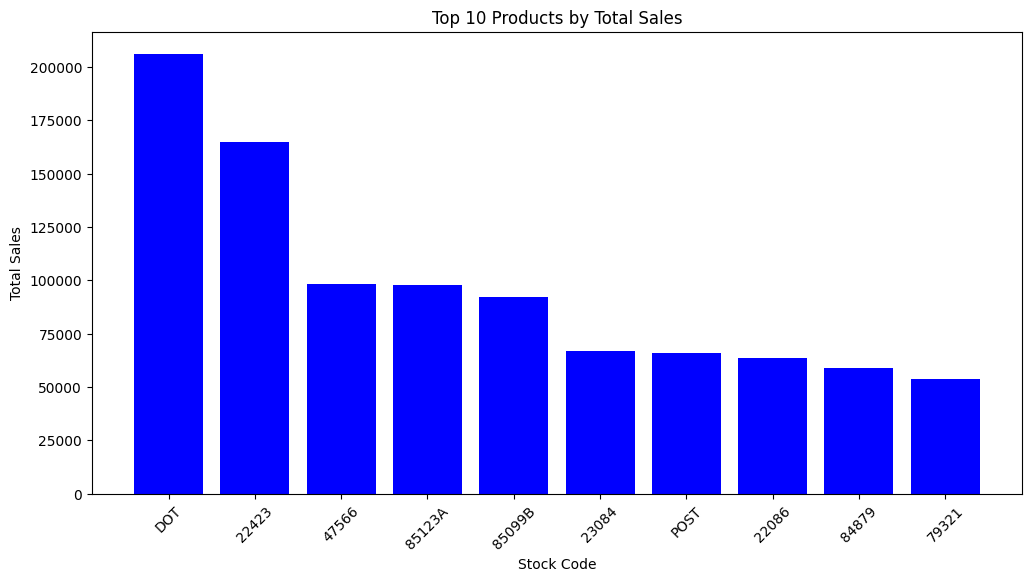

In [26]:
#getting the first 10 stock codes
top_n = 10
top_sales_per_product = sales_per_product.nlargest(top_n, 'TotalPrice')

plt.figure(figsize=(12, 6))
plt.bar(top_sales_per_product['StockCode'], top_sales_per_product['TotalPrice'], color='blue')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Stock Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.show()


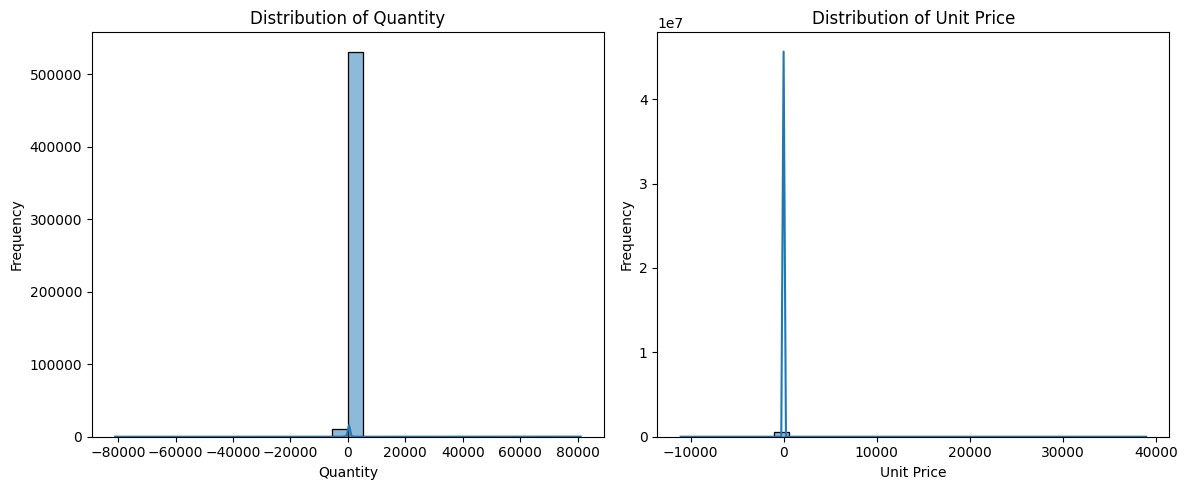

In [29]:
plt.figure(figsize=(12, 5))

#quantity histogram
plt.subplot(1, 2, 1)  
sns.histplot(df['Quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')

#unitprice histogram
plt.subplot(1, 2, 2) 
sns.histplot(df['UnitPrice'], bins=30, kde=True)
plt.title('Distribution of Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [30]:
#total sales per dates
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

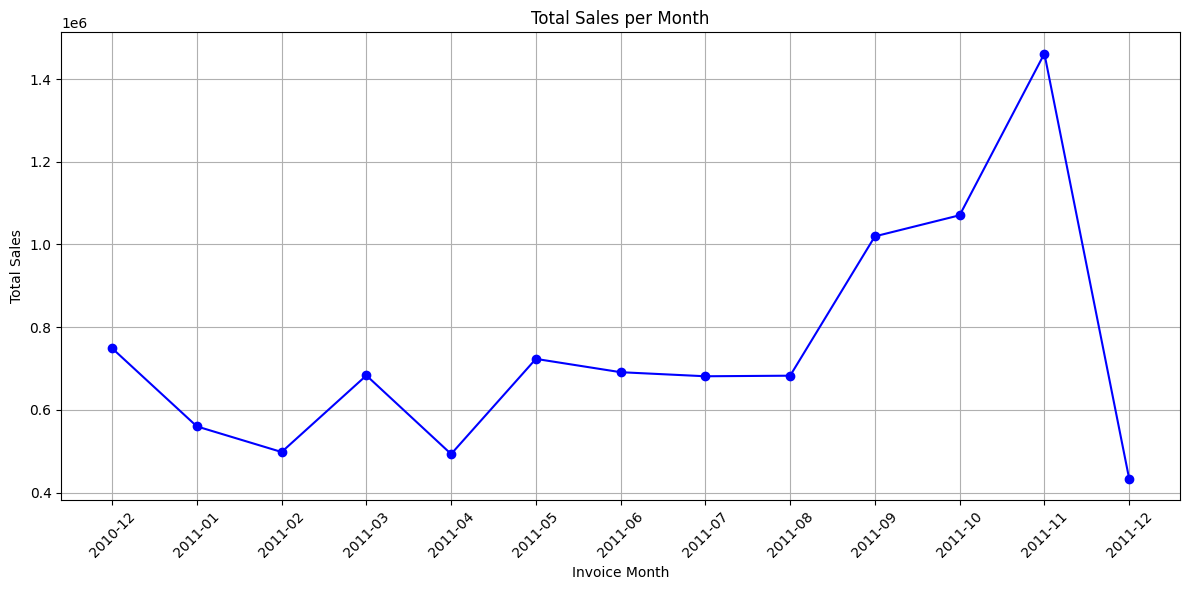

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['InvoiceMonth'].astype(str), monthly_sales['TotalPrice'], marker='o', color='blue')
plt.title('Total Sales per Month')
plt.xlabel('Invoice Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.grid() 
plt.tight_layout()
plt.show()

In [32]:
#analysis about customers
customer_analysis = df.groupby('CustomerID').agg(
    TotalSpending=('TotalPrice', 'sum'),
    PurchaseFrequency=('InvoiceNo', 'nunique')  
).reset_index()

In [33]:
country_analysis = df.groupby('Country').agg(
    TotalSales=('TotalPrice', 'sum')
).reset_index()

In [34]:
print(customer_analysis.head()) 
print(country_analysis.head())  


   CustomerID  TotalSpending  PurchaseFrequency
0     12346.0           0.00                  2
1     12347.0        4310.00                  7
2     12348.0        1797.24                  4
3     12349.0        1757.55                  1
4     12350.0         334.40                  1
     Country  TotalSales
0  Australia   137077.27
1    Austria    10154.32
2    Bahrain      548.40
3    Belgium    40910.96
4     Brazil     1143.60


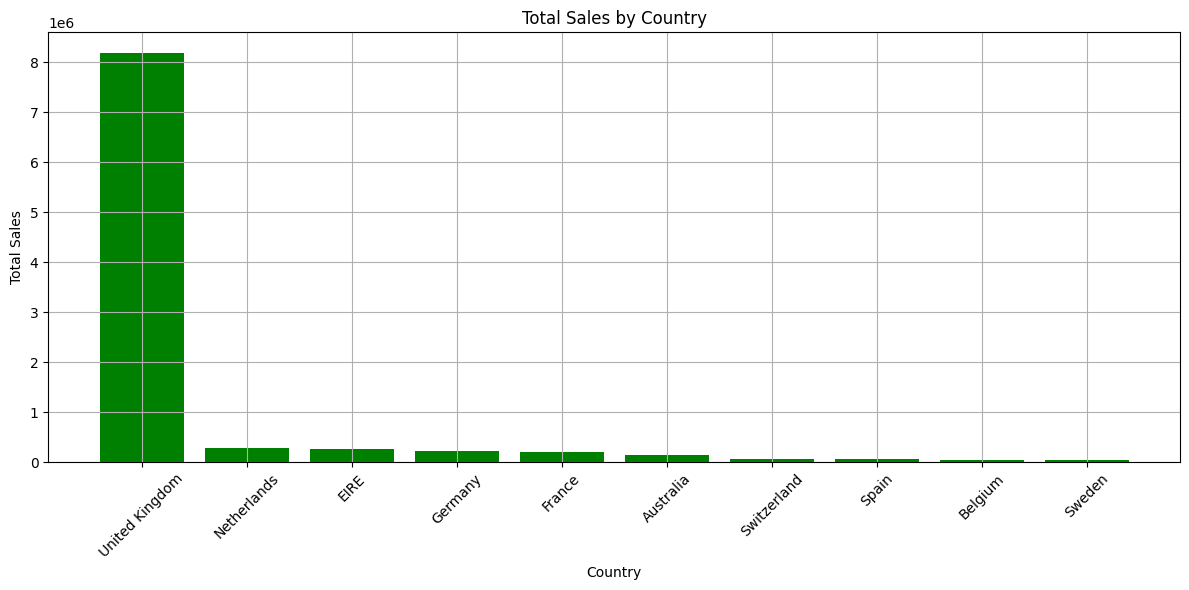

In [37]:
#visualize total sells by a country
plt.figure(figsize=(12, 6))
country_analysis = country_analysis.nlargest(10, 'TotalSales') 
plt.bar(country_analysis['Country'], country_analysis['TotalSales'], color='green')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  
plt.grid()  
plt.tight_layout()  
plt.show()

In [38]:
#top selling product
top_products = sales_per_product.sort_values(by='TotalPrice', ascending=False).head(10)  
print(top_products)

     StockCode  TotalPrice
4059       DOT   206245.48
1348     22423   164762.19
2733     47566    98302.98
3536    85123A    97894.50
3515    85099B    92356.03
1982     23084    66756.59
4062      POST    66230.64
1043     22086    63791.94
3305     84879    58959.73
2924     79321    53768.06
